In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class G:
  def __init__(self, r=0, i=0):
    self.re = r
    self.im = i

  def __add__(self, x):
    return G(self.re + x.re, self.im + x.im)

  def __sub__(self, x):
    return G(self.re - x.re, self.im - x.im)

  def __mul__(self, x):
    a = self.re
    b = self.im
    c = x.re
    d = x.im
    return G(a*c - b*d, a*d + b*c + b*d)

  def __str__(self):
    return str(self.re) + " + " + str(self.im) + "ω"

  def __repr__(self):
    return str(self)

  def coords(self):
    return self.re, self.im

  def norm(self):
    a = self.re
    b = self.im
    return a**2 + a*b + b**2

  def conjugate(self):
    return G(self.re + self.im, -self.im)

  def __truediv__(self, x):
    if x.norm() == 0:
      raise Exception("Division by zero")
    int_num = self * x.conjugate() # numerator of the complex quotient a / b
    a, b = int_num.coords()
    int_den = x.norm() # denominator of the complex quotient a / b
    a, b = a / int_den, b / int_den # components of the complex quotient a / b

    return G(a, b)

  def real(self):
    return self.re

  def imaginary(self):
    return self.im


In [ ]:
def gauss_gcd_step(a, b):
  x, y = (a / b).coords()

  # u = x - (1 / math.sqrt(3)) * y
  # v = (2 / math.sqrt(3)) * y

  u, v = x, y

  qx, qy = math.floor(u + 0.5), math.floor(v + 0.5)

  q = G(qx, qy)

  r = a - q * b

  return q, r

In [ ]:
# def gauss_gcd(a, b):
#   q, r = gauss_gcd_step(a, b)
#   steps = 1
#   while abs(r.norm()) > 0:
#     a, b = b, r
#     q, r = gauss_gcd_step(a, b)
#     steps += 1
#   return b, steps

In [ ]:
def gauss_gcd(a, b):
  q, r = gauss_gcd_step(a, b)
  q1 = r
  steps = 1
  while r.norm() > 0:
    a, b = b, r
    q, r = gauss_gcd_step(a, b)
    steps += 1
    # if steps == 1:
    #   q1 = r
  return b, steps, q1

In [ ]:
a = G(73, 41)
# 73 and 41
# 119 120

grid_size = 200

dividends = [G(x, y) for x in range(-grid_size, grid_size) for y in range(-grid_size, grid_size)]


In [ ]:
steps = []
quots = []
for b in dividends:
  if b.norm() == 0:
    steps.append(1)
    quots.append(0)
    continue
  _, s, q = gauss_gcd(a, b)
  steps.append(s)
  quots.append(q.norm())

In [ ]:
def embed(x, y):
  return x + 0.5 * y, (np.sqrt(3) / 2) * y

In [ ]:
xhex, yhex = [], []

for z in dividends:
    x, y = z.coords()
    X, Y = embed(x, y)
    xhex.append(X)
    yhex.append(Y)

In [ ]:
# assocs = [a, a * G(-1, 0), a * G(0,1), a * G(0,-1), a * G(-1, 1), a * G(1, -1)]
assocs = [a]

In [ ]:
# d2 = [G(x, y) for x in range(-10, 10) for y in range(-10, 10)]

# for b in d2:
#     if b.norm() != 0:
#         assocs.append(a / b)

In [ ]:
# d2 = [gg.GG(x, y) for x in range(-5, 5) for y in range(-5, 5)]
d2 = [G(1, 0)]

for b in d2:
    if b.norm() != 0:
        for i in [3, 5]:
          assocs.append(a / G(i, 0))
          assocs.append(a / G(0, i))
          assocs.append(a / G(-i, 0))
          assocs.append(a / G(0, -i))

In [ ]:
print((a * G(-1, 1) - a * G(1, -1)).norm())

40012


In [ ]:
def circ(t, c, r):
    return np.stack([c.real() + r * np.cos(t) - (1 / np.sqrt(3)) * np.sin(t), c.imaginary() + r * (2 / np.sqrt(3)) * np.sin(t)], axis=1)

In [ ]:
fine = np.linspace(0, 2*np.pi, 100)

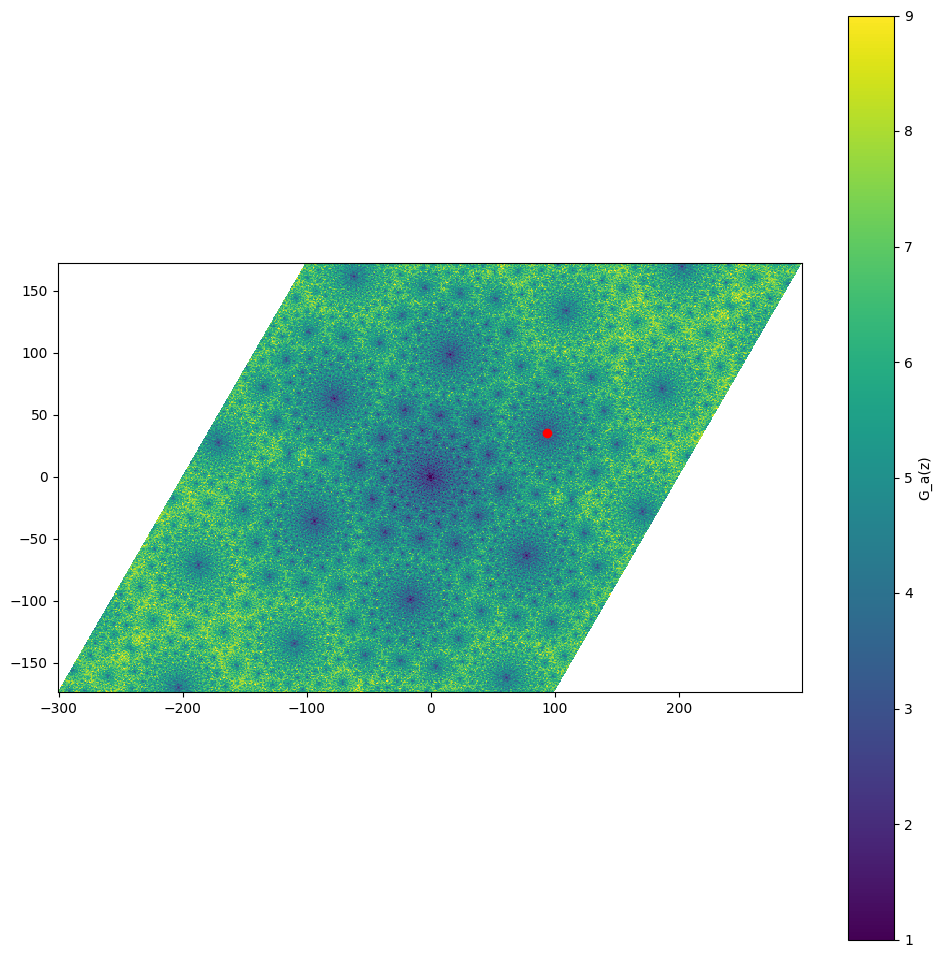

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')
X, Y = embed(X, Y)

Z = np.array(steps).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

plt.gca().set_aspect('equal')

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

# plt.plot(pts[:,0], pts[:,1], color='orange')

plt.gca().set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("G_a(z)")

plt.show()

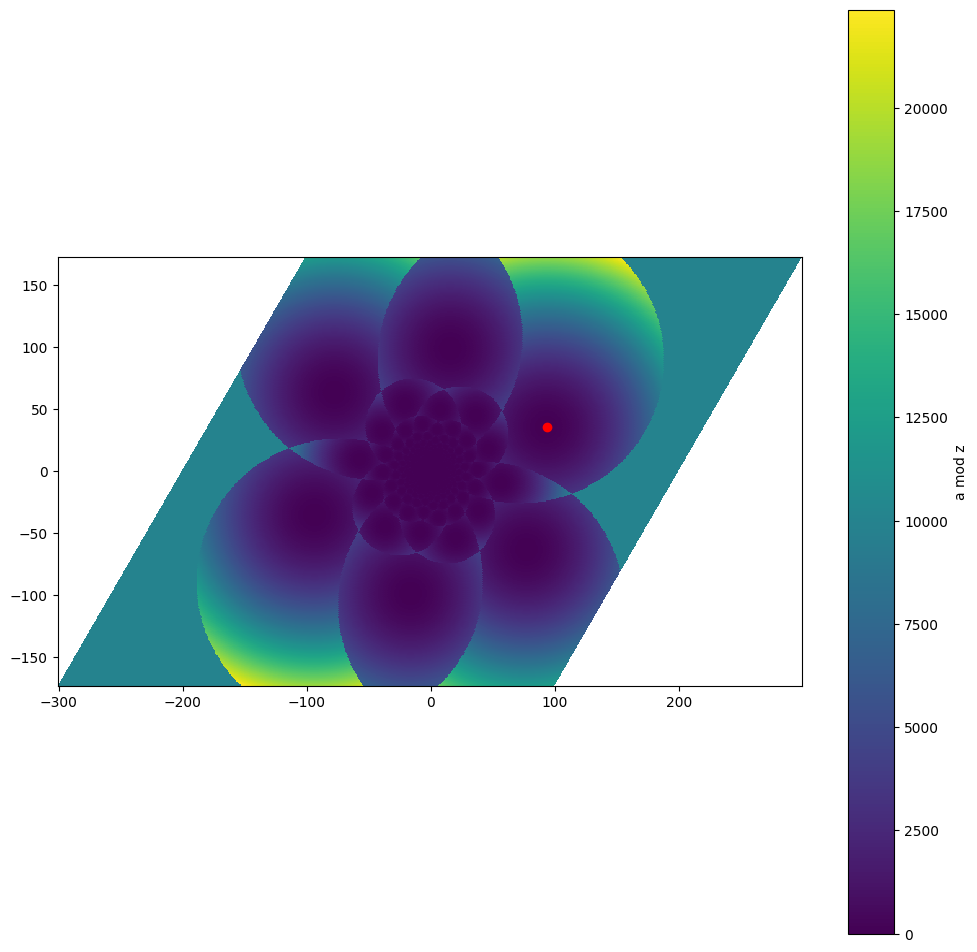

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

x, y = np.array(range(-grid_size, grid_size)), np.array(range(-grid_size, grid_size))
X, Y = np.meshgrid(x, y, indexing='ij')

X, Y = embed(X, Y)

Z = np.array(quots).reshape(len(x), len(y))

cf = plt.pcolormesh(
    X,
    Y,
    Z,
    cmap='viridis',
    shading='nearest'
)

for assoc in assocs:
    as_x, as_y = embed(assoc.real(), assoc.imaginary())
    ax.scatter(as_x, as_y, color='red', zorder=5)

# pts = circ(fine, a / G(2, 0), np.sqrt((a / G(2, 0)).norm()))
# plt.plot(pts[:,0], pts[:,1], color='orange')

# plt.plot(pts[:,0], pts[:,1], color='orange')

ax.set_aspect('equal')

cbar = plt.colorbar(cf)
cbar.set_label("a mod z")

plt.show()